# **Projek : Analisis Sentimen terhadap Ulasan Aplikasi Gojek di Play Store**

- **Nama**: Muhammad Azhar Putra Nadian
- **Email**: azharnadian@student.ub.ac.id
- **ID Dicoding**: azharnadian
- **Cohort ID**: MC006D5Y1335
- **Coding Camp Email**: mc006d5y1335@student.devacademy.id

## Import Library

In [6]:
!pip install pipreqs

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)

import matplotlib.pyplot as plt
import datetime as dt
import re
import string
import csv
import requests
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

!pip install gensim
from gensim.models import Word2Vec

!pip install wordcloud
from wordcloud import WordCloud

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\azhar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\azhar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\azhar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\azhar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\azhar\AppData\Roaming\nltk_data...
[

## Load Dataset

In [14]:
reviews_gojek_df = pd.read_csv('ulasan_gojek_full.csv')

reviews_gojek_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,595da86c-acc1-4a64-ae43-90ff85eaf53d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terlalu terlalu terlalu... apk yg tidak bisa d...,1,1,4.31.1,2022-04-21 20:37:07,"Hai, mohon maaf atas kendala yang kamu alami. ...",2022-04-22 08:33:31,4.31.1
1,7874a624-ec35-4b2f-8b1b-d34e160c5180,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pesan go food dengan estimasi awal 30-40 menit...,1,22,5.16.3,2025-04-11 20:18:06,"Hai Kak Afiifah, mohon maaf atas ketidaknyaman...",2025-04-11 21:39:05,5.16.3
2,606f946d-2bab-4c43-9b20-429a679a8fe0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi ga jelas, sering banget gofood udh nu...",1,62,5.15.1,2025-04-03 22:04:48,"Hai Kak Andreas, mohon maaf atas ketidaknyaman...",2025-04-04 09:40:35,5.15.1
3,46c3b900-0136-4fbf-91a0-c3f73d661fac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sebagai pengguna lama baru kali ini saya kecew...,1,36,5.14.2,2025-04-07 14:25:32,"Hai Kak Harliani, mohon maaf atas ketidaknyama...",2025-04-07 15:59:35,5.14.2
4,825e4595-c073-4388-8229-415e372b6c01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tinggal 2menit lg driver sampe di lokasi tiba-...,1,175,5.14.2,2025-03-26 07:35:56,"Hai Kak Wahyu, mohon maaf atas ketidaknyamanan...",2025-03-26 11:26:47,5.14.2


In [16]:
reviews_gojek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              90000 non-null  object
 1   userName              90000 non-null  object
 2   userImage             90000 non-null  object
 3   content               89999 non-null  object
 4   score                 90000 non-null  int64 
 5   thumbsUpCount         90000 non-null  int64 
 6   reviewCreatedVersion  72303 non-null  object
 7   at                    90000 non-null  object
 8   replyContent          33205 non-null  object
 9   repliedAt             33205 non-null  object
 10  appVersion            72303 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.6+ MB


**Insight**: Dataset hasil scraping memiliki 90000 baris dan 11 kolom

## Data Cleaning

Menghapus missing values

In [21]:
df = reviews_gojek_df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26224 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              26224 non-null  object
 1   userName              26224 non-null  object
 2   userImage             26224 non-null  object
 3   content               26224 non-null  object
 4   score                 26224 non-null  int64 
 5   thumbsUpCount         26224 non-null  int64 
 6   reviewCreatedVersion  26224 non-null  object
 7   at                    26224 non-null  object
 8   replyContent          26224 non-null  object
 9   repliedAt             26224 non-null  object
 10  appVersion            26224 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.4+ MB


Mengecek Duplikasi

In [26]:
print(df.duplicated().sum())

0


**Insight**: Dataset tidak mempunyai duplikasi data di dalamnya

## Preprocessing Data

In [30]:
#membersihkan data dari variabel tak perlu
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) #menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) #menghapus RT
    text = re.sub(r"http\S+", '', text) #menghapus link
    text = re.sub(r'[0-9]+', '', text) #menghapus angka
    text = re.sub(r'[^\w\s]', '', text) #menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') #mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) #menghapus semua tanda baca
    text = text.strip(' ') #menghapus karakter spasi dari kiri dan kanan teks
    return text

#mengubah semua karakter dalam teks menjadi huruf kecil
def casefoldingText(text): 
    text = text.lower()
    return text

#memecah atau membagi string, teks menjadi daftar token
def tokenizingText(text): 
    text = word_tokenize(text)
    return text

#menghapus stopwords dalam teks
def filteringText(text): 
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa", "gk","loh","kah","woi","woii","woy", "yang", "yg"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

#mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
def stemmingText(text): 
    #membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    #memecah teks menjadi daftar kata
    words = text.split()

    #menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    #menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

#mengubah daftar kata menjadi kalimat
def toSentence(list_words): 
    sentence = ' '.join(word for word in list_words)
    return sentence

In [31]:
#mengidentifikasi slangwords
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "gak": "tidak", "ga": "tidak", "tp": "tapi",
    "sbnrnya": "sebenarnya", "tdk": "tidak", "trs": "terus", "blm": "belum", "lg": "lagi",
    "krn": "karena", "kmrn": "kemarin", "td": "tadi", "sm": "sama", "sy": "saya",
    "gw": "saya", "lu": "kamu", "u": "kamu", "pd": "pada", "jg": "juga", "dkt": "dekat",
    "brp": "berapa", "mlm": "malam", "malem": "malam", "dgn": "dengan", "jgk": "juga", "aj": "aja",
    "mo": "mau", "msh": "masih", "km": "kamu", "gw": "saya", "doi": "dia", "lm":"lama", "cncl":"cancel", 
    "yg":"yang", "bls":"balas", "bales":"balas"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [32]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [35]:
display(display(df))

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,595da86c-acc1-4a64-ae43-90ff85eaf53d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terlalu terlalu terlalu... apk yg tidak bisa d...,1,1,4.31.1,2022-04-21 20:37:07,"Hai, mohon maaf atas kendala yang kamu alami. ...",2022-04-22 08:33:31,4.31.1,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu apk yg tidak bisa di p...,terlalu terlalu terlalu apk yang tidak bisa di...,"[terlalu, terlalu, terlalu, apk, yang, tidak, ...","[apk, percaya, kuota, cepat, habis, update, bu...",apk percaya kuota cepat habis update bug tmbah...
1,7874a624-ec35-4b2f-8b1b-d34e160c5180,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pesan go food dengan estimasi awal 30-40 menit...,1,22,5.16.3,2025-04-11 20:18:06,"Hai Kak Afiifah, mohon maaf atas ketidaknyaman...",2025-04-11 21:39:05,5.16.3,pesan go food dengan estimasi awal menit lalu...,pesan go food dengan estimasi awal menit lalu...,pesan go food dengan estimasi awal menit lalu ...,"[pesan, go, food, dengan, estimasi, awal, meni...","[pesan, go, food, estimasi, menit, tulisannya,...",pesan go food estimasi menit tulisannya telat ...
2,606f946d-2bab-4c43-9b20-429a679a8fe0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi ga jelas, sering banget gofood udh nu...",1,62,5.15.1,2025-04-03 22:04:48,"Hai Kak Andreas, mohon maaf atas ketidaknyaman...",2025-04-04 09:40:35,5.15.1,aplikasi ga jelas sering banget gofood udh nun...,aplikasi ga jelas sering banget gofood udh nun...,aplikasi tidak jelas sering banget gofood udh ...,"[aplikasi, tidak, jelas, sering, banget, gofoo...","[aplikasi, banget, gofood, udh, nunggu, jam, c...",aplikasi banget gofood udh nunggu jam cancle a...
3,46c3b900-0136-4fbf-91a0-c3f73d661fac,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sebagai pengguna lama baru kali ini saya kecew...,1,36,5.14.2,2025-04-07 14:25:32,"Hai Kak Harliani, mohon maaf atas ketidaknyama...",2025-04-07 15:59:35,5.14.2,sebagai pengguna lama baru kali ini saya kecew...,sebagai pengguna lama baru kali ini saya kecew...,sebagai pengguna lama baru kali ini saya kecew...,"[sebagai, pengguna, lama, baru, kali, ini, say...","[pengguna, kali, kecewa, aplikasi, gojek, goca...",pengguna kali kecewa aplikasi gojek gocar kada...
4,825e4595-c073-4388-8229-415e372b6c01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tinggal 2menit lg driver sampe di lokasi tiba-...,1,175,5.14.2,2025-03-26 07:35:56,"Hai Kak Wahyu, mohon maaf atas ketidaknyamanan...",2025-03-26 11:26:47,5.14.2,tinggal menit lg driver sampe di lokasi tibati...,tinggal menit lg driver sampe di lokasi tibati...,tinggal menit lagi driver sampe di lokasi tiba...,"[tinggal, menit, lagi, driver, sampe, di, loka...","[tinggal, menit, driver, sampe, lokasi, tibati...",tinggal menit driver sampe lokasi tibatiba dib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89979,5cb0f0de-af5e-4efa-9308-c8998f783ddc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa gopay later nya tidak bisa dipakai diap...,3,0,4.90.2,2024-07-13 08:59:11,"Hai Kak Suryadi, mohon maaf atas ketidaknyaman...",2024-07-13 16:11:30,4.90.2,Kenapa gopay later nya tidak bisa dipakai diap...,kenapa gopay later nya tidak bisa dipakai diap...,kenapa gopay later nya tidak bisa dipakai diap...,"[kenapa, gopay, later, nya, tidak, bisa, dipak...","[gopay, later, dipakai, diaplikasi, tiktok, ng...",gopay later dipakai diaplikasi tiktok ngapain ...
89982,7922c84e-e417-43f5-a305-983859955c66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Di handphone mi 11 lite knp aplikasinya error....,3,0,4.26.1,2021-09-01 18:10:47,"Hai Adi Harmoko, mohon maaf untuk kendalanya. ...",2021-09-02 12:29:47,4.26.1,Di handphone mi lite knp apl

None

## Labeling

In [39]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [41]:
#menentukan polaritas sentimen
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word] #jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word] #jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score > 0):
        polarity = 'positive' #jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative' #jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'

    return score, polarity

In [43]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
df['polarity_score'], df['polarity'] = zip(*results)

print(df['polarity'].value_counts())

polarity
negative    16181
positive     8236
neutral      1807
Name: count, dtype: int64


## Feature Extraction

### TF-IDF

Pada tahap ekstraksi fitur menggunakan TF-IDF, saya menggunakan 7.000 fitur dan menerapkan unigram, bigram, serta trigram. Saya juga mengaplikasikan SMOTE untuk menangani masalah ketidakseimbangan kelas dalam data sentimen.

In [48]:
from collections import Counter
from imblearn.over_sampling import SMOTE

#memisahkan data menjadi fitur dan label (sentimen)
X = df['text_akhir']
y = df['polarity']

#ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=7000, min_df=5, max_df=0.9 )
X_tfidf = tfidf.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

#membagi data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#membagi data 70:30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

### Word2Vec

In [50]:
sentences = df['text_akhir'].apply(word_tokenize).tolist()

#melatih word2vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
     

def get_vector(sentence, model, vector_size):
    words = word_tokenize(sentence)
    word_vectors = [model.wv[word] for word in words if word in model.wv]

    if len(word_vectors) == 0:
        return np.zeros(vector_size)  #jika tidak ada kata yang cocok, nanti mengembalikan vektor nol
    else:
        return np.mean(word_vectors, axis=0)  #rata-rata vektor dari semua kata

#mengonversi menjadi vektor
X_vectors = np.array([get_vector(text, w2v_model, 100) for text in df['text_akhir']])

y3 = df['polarity']

#split data 80:20
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_vectors, y3, test_size=0.2, random_state=42)

## Modeling

Pada tahap pemodelan, saya menguji berbagai skema pelatihan yang melibatkan variasi algoritma (SVM, Random Forest, dan Logistic Regression), metode ekstraksi fitur (TF-IDF dan Word2Vec), serta pembagian data (80:20 dan 70:30).

### SVM dengan Pembagian Data 80:20

In [56]:
#membangun model
svm_model = LinearSVC()

#melatih model
svm_model.fit(X_train, y_train)

y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

#evaluasi performa model
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9800432610598959
SVM - accuracy_test: 0.9306828715624678


**Insight**: Pemodelan dilakukan dengan ekstraksi fitur TF-IDF dan algoritma Logistic Regression, sementara data dibagi dengan rasio 80:20 untuk data latih dan data uji. Akurasi sebesar 98% pada data latih dan 93.06% pada data uji dicapai, yang menunjukkan bahwa kinerja model dalam mengklasifikasikan sentimen tergolong baik."

### Random Forest dengan Pembagian Data 80:20

In [60]:
#membangun model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih model
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

#evaluasi perfrma model
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9999742493691095
Random Forest - accuracy_test: 0.9050365640127717


**Insight**: Pemodelan dilakukan dengan ekstraksi fitur TF-IDF dan algoritma Random Forest, sementara data dibagi dengan rasio 80:20 untuk data latih dan data uji. Akurasi sebesar 99.99% pada data latih dan 90.5% pada data uji dicapai, yang menunjukkan bahwa kinerja model dalam mengklasifikasikan sentimen tergolong baik."

### Logistic Regression dengan Pembagian Data 80:20

In [64]:
#membangun model
logistic_regression = LogisticRegression()

#melatih model
logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

#evaluasi performa model
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

C:\Users\azhar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - accuracy_train: 0.9327136014832363
Logistic Regression - accuracy_test: 0.8915439283139355


**Insight**: Pemodelan dilakukan dengan ekstraksi fitur TF-IDF dan algoritma Logistic Regression, sementara data dibagi dengan rasio 80:20 untuk data latih dan data uji. Akurasi sebesar 93.27% pada data latih dan 89.15% pada data uji dicapai, yang menunjukkan bahwa kinerja model dalam mengklasifikasikan sentimen tergolong baik."

### SVM dengan Pembagian Data 70:30

In [68]:
#membangun model
svm_model2 = LinearSVC()

#melatih model
svm_model2.fit(X_train2, y_train2)

y_pred_train_svm2 = svm_model2.predict(X_train2)
y_pred_test_svm2 = svm_model2.predict(X_test2)

#evaluasi performa model
accuracy_train_svm2 = accuracy_score(y_train2, y_pred_train_svm2)
accuracy_test_svm2 = accuracy_score(y_test2, y_pred_test_svm2)

print('SVM - accuracy_train:', accuracy_train_svm2)
print('SVM - accuracy_test:', accuracy_test_svm2)

SVM - accuracy_train: 0.9811359623307828
SVM - accuracy_test: 0.92570212181556


**Insight**: Pemodelan dilakukan dengan ekstraksi fitur TF-IDF dan algoritma Logistic Regression, sementara data dibagi dengan rasio 70:30 untuk data latih dan data uji. Akurasi sebesar 98.11% pada data latih dan 92.57% pada data uji dicapai, yang menunjukkan bahwa kinerja model dalam mengklasifikasikan sentimen tergolong baik."

### Random Forest dengan Pembagian Data 70:30

In [72]:
#membangun model
random_forest2 = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih model
random_forest2.fit(X_train2.toarray(), y_train2)

y_pred_train_rf2 = random_forest2.predict(X_train2.toarray())
y_pred_test_rf2 = random_forest2.predict(X_test2.toarray())

#evaluasi perfrma model
accuracy_train_rf2 = accuracy_score(y_pred_train_rf2, y_train2)
accuracy_test_rf2 = accuracy_score(y_pred_test_rf2, y_test2)

print('Random Forest - accuracy_train:', accuracy_train_rf2)
print('Random Forest - accuracy_test:', accuracy_test_rf2)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.9012566092151343


**Insight**: Pemodelan dilakukan dengan ekstraksi fitur TF-IDF dan algoritma Logistic Regression, sementara data dibagi dengan rasio 70:30 untuk data latih dan data uji. Akurasi sebesar 100% pada data latih dan 90.12% pada data uji dicapai, yang menunjukkan bahwa kinerja model dalam mengklasifikasikan sentimen tergolong baik."

### Logistic Regression dengan Pembagian Data 70:30

In [76]:
#membangun model
logistic_regression2 = LogisticRegression()

#melatih model
logistic_regression2.fit(X_train2.toarray(), y_train2)

y_pred_train_lr2 = logistic_regression2.predict(X_train2.toarray())
y_pred_test_lr2 = logistic_regression2.predict(X_test2.toarray())

#evaluasi performa model
accuracy_train_lr2 = accuracy_score(y_pred_train_lr2, y_train2)
accuracy_test_lr2 = accuracy_score(y_pred_test_lr2, y_test2)

print('Logistic Regression - accuracy_train:', accuracy_train_lr2)
print('Logistic Regression - accuracy_test:', accuracy_test_lr2)

Logistic Regression - accuracy_train: 0.9317539729252502
Logistic Regression - accuracy_test: 0.8860124974249811


**Insight**: Pemodelan dilakukan dengan ekstraksi fitur TF-IDF dan algoritma Logistic Regression, sementara data dibagi dengan rasio 70:30 untuk data latih dan data uji. Akurasi sebesar 93.17% pada data latih dan 88.6% pada data uji dicapai, yang menunjukkan bahwa kinerja model dalam mengklasifikasikan sentimen tergolong baik."

## Menggunakan Ekstraksi Fitur Word2Vec

### SVM

In [81]:
#membangun model
svm_model3 = LinearSVC()

#melatih model
svm_model3.fit(X_train3, y_train3)

y_pred_train_svm3 = svm_model3.predict(X_train3)
y_pred_test_svm3 = svm_model3.predict(X_test3)

#evaluasi performa model
accuracy_train_svm3 = accuracy_score(y_train3, y_pred_train_svm3)
accuracy_test_svm3 = accuracy_score(y_test3, y_pred_test_svm3)

print('SVM - accuracy_train:', accuracy_train_svm3)
print('SVM - accuracy_test:', accuracy_test_svm3)

SVM - accuracy_train: 0.7224843891510558
SVM - accuracy_test: 0.7119161105815062


**Insight**: Pemodelan dilakukan dengan menggunakan ekstraksi fitur Word2Vec dan algoritma SVM. Dalam proses ini, data dibagi dengan rasio 80:20 untuk data latih dan data uji. Berdasarkan hasil evaluasi, akurasi sebesar 72,24% pada data latih dan 71,19% pada data uji diperoleh oleh model SVM.

### Random Forest

In [85]:
#membangun model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih model
rf_model.fit(X_train3, y_train3)

y_pred_train_rf3 = rf_model.predict(X_train3)
y_pred_test_rf3 = rf_model.predict(X_test3)

#evaluasi performa model
accuracy_train_rf3 = accuracy_score(y_train3, y_pred_train_rf3)
accuracy_test_rf3 = accuracy_score(y_test3, y_pred_test_rf3)

print("Random Forest - accuracy_train:", accuracy_train_rf3)
print("Random Forest - accuracy_test:", accuracy_test_rf3)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.6899904671115348


**Insight**: Pemodelan dilakukan dengan menggunakan ekstraksi fitur Word2Vec dan algoritma SVM. Dalam proses ini, data dibagi dengan rasio 80:20 untuk data latih dan data uji. Berdasarkan hasil evaluasi, akurasi sebesar 100% pada data latih dan 68,99% pada data uji diperoleh oleh model SVM.

### Logistic Regression

In [89]:
#membangun model
logistic_regression3 = LogisticRegression()

#melatih model
logistic_regression3.fit(X_train3, y_train3)

y_pred_train_lr3 = logistic_regression3.predict(X_train3)
y_pred_test_lr3 = logistic_regression3.predict(X_test3)

#evaluasi performa model
accuracy_train_lr3 = accuracy_score(y_pred_train_lr3, y_train3)
accuracy_test_lr3 = accuracy_score(y_pred_test_lr3, y_test3)

print('Logistic Regression - accuracy_train:', accuracy_train_lr3)
print('Logistic Regression - accuracy_test:', accuracy_test_lr3)

Logistic Regression - accuracy_train: 0.7097097097097097
Logistic Regression - accuracy_test: 0.6976167778836988


C:\Users\azhar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Insight**: Pemodelan dilakukan dengan menggunakan ekstraksi fitur Word2Vec dan algoritma SVM. Dalam proses ini, data dibagi dengan rasio 80:20 untuk data latih dan data uji. Berdasarkan hasil evaluasi, akurasi sebesar 70,97% pada data latih dan 69,76% pada data uji diperoleh oleh model SVM.

### **Kesimpulan**

Berdasarkan hasil evaluasi terhadap berbagai kombinasi pemodelan, dapat disimpulkan beberapa hal sebagai berikut:
- Model yang menggunakan ekstraksi fitur TF-IDF menunjukkan performa yang lebih konsisten dibandingkan dengan model yang dibangun menggunakan Word2Vec. Hal ini tercermin dari perbedaan akurasi yang lebih kecil antara data latih dan data uji pada model TF-IDF, yang menandakan bahwa generalisasi model lebih baik.
- Indikasi overfitting terdeteksi pada algoritma Random Forest, di mana akurasi hampir mencapai 100% pada data latih baik saat menggunakan TF-IDF maupun Word2Vec, sementara akurasi pada data uji menunjukkan selisih yang cukup besar.
- Hasil akurasi yang baik dicapai oleh model SVM dan Logistic Regression ketika dipadukan dengan fitur TF-IDF. Kinerja kedua model ini terpantau cukup stabil dan tidak menunjukkan gejala overfitting.
- Sebaliknya, semua model yang menggunakan Word2Vec mengalami penurunan akurasi ketika diuji pada data uji, dan penurunan paling signifikan ditemukan pada model Random Forest.

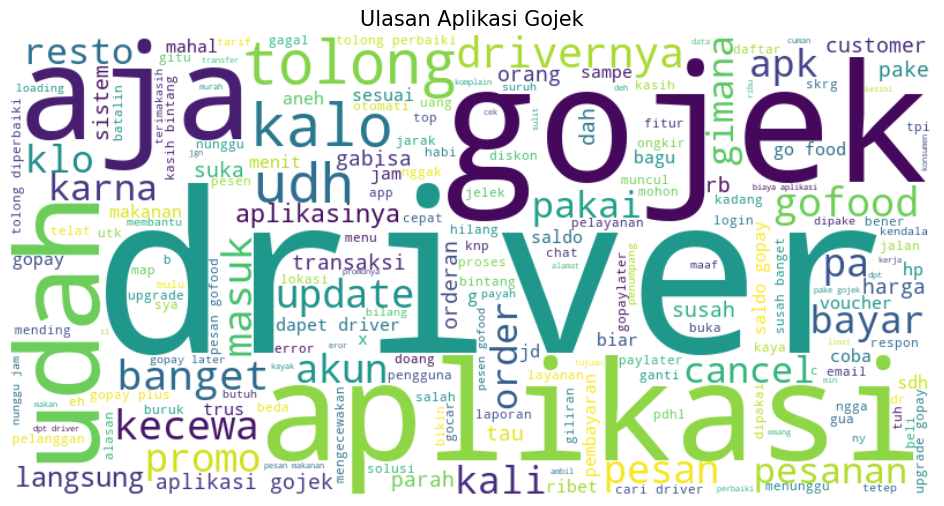

In [99]:
all_text = " ".join(df['text_akhir'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_color='steelblue',
    contour_width=2
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ulasan Aplikasi Gojek", fontsize=15)
plt.show()

**Insight**: Berdasarkan hasil visualisasi word cloud, tampak bahwa kata-kata seperti *driver*, *gojek*, dan *akun* menjadi topik yang paling sering muncul dalam ulasan pengguna. Di sisi lain, muncul pula beberapa kata bernada negatif seperti *error*, *telat*, *login*, dan *upgrade*, yang mengindikasikan adanya keluhan dari pengguna. Temuan ini dapat dijadikan masukan penting bagi pengembang aplikasi Gojek untuk melakukan perbaikan, khususnya dalam hal kenyamanan penumpang dan kemudahan akses akun, guna meningkatkan kualitas pengalaman pengguna secara keseluruhan.

In [102]:
conda list


# packages in environment at C:\Users\azhar\anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2024.10             py312_mkl_0  
aext-assistant            4.1.0           py312haa95532_jl4_0  
aext-assistant-server     4.1.0           py312haa95532_0  
aext-core                 4.1.0           py312haa95532_jl4_0  
aext-core-server          4.1.0           py312haa95532_0  
aext-panels               4.1.0           py312haa95532_0  
aext-panels-server        4.1.0           py312haa95532_0  
aext-project-filebrowser-server 4.1.0           py312haa95532_0  
aext-share-notebook       4.1.0           py312haa95532_0  
aext-share-notebook-server 4.1.0           py312haa95532_0  
aext-shared               4.1.0           py312haa95532_0  
aiobotocore               2.12.3          py312haa95532_0  
aiohappyeyeballs          2.4.0           py312haa95532_0  
aiohttp                   3.10.5          py312h827c3e9_0  
aioitertools         